# Modelo de Regressão para prever o coeficiente do nível de "Pobreza Multidimensional Não Monetária" (IPM-NM)

O código abaixo foi concebido para antecipar o índice de Pobreza Multidimensional Não Monetária (base IPM-NM), utilizando condicionantes e subgrupos específicos. Essa previsão abrange os períodos de 2008-2009 e 2017-2018.<br><br>
Este modelo de regressão desempenha um papel essencial na compreensão e análise da pobreza multidimensional, ultrapassando as considerações ligadas à renda financeira.<br><br>
Além disso, a importância deste modelo transcende a mera previsão da pobreza monetária, estendendo-se à avaliação do consumo de produtos alimentícios. Ao incorporar variáveis multidimensionais, o modelo proporciona insights sobre as condições de vida e os fatores que contribuem para a pobreza em diversas dimensões, incluindo a alimentação.<br><br>
O propósito subjacente a este código em desenvolvimento é antever o nível de pobreza nas famílias, explorando as diversas características disponíveis na base de dados.

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Instalação das Bibliotecas

In [135]:
!pip install unidecode
!pip install scikit-learn

# Importação de bibliotecas

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from unidecode import unidecode

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Base de dados utilizadas

Neste momento estamos utilizando duas bases consolidadas no ano de 2008 e 2009, e outra do ano de 2017 e 2018.

In [137]:
pof6_2008_2009 = pd.read_excel('/content/drive/MyDrive/T4M8G4/Base de dados/POF _ 2008_2009/IPM-NM - Tabela 6a.xlsx')

In [138]:
pof6_2017_2018 = pd.read_excel('/content/drive/MyDrive/T4M8G4/Base de dados/POF _ 2017_2018/IPM-NM - Tabela 6b.xlsx')

A fim de unir as duas tabelas, irei concatená-las para buscar a diferença entre os dois períodos

In [139]:
pof6 = pd.concat([pof6_2008_2009, pof6_2017_2018], ignore_index=True)

In [140]:
pof6.dtypes

Unidades da Federação                                  object
Proporção de pessoas das famílias residentes (%)      float64
Proporção de pessoas com algum grau de pobreza (%)    float64
IPM-NM                                                float64
Moradia                                               float64
Acesso aos serviços de utilidade pública              float64
Saúde e alimentação                                   float64
Educação                                              float64
Acesso a serviços financeiros e padrão de vida        float64
Transporte e lazer                                    float64
dtype: object

In [141]:
display(pof6.head(11))

,Unidades da Federação,Proporção de pessoas das famílias residentes (%),Proporção de pessoas com algum grau de pobreza (%),IPM-NM,Moradia,Acesso aos serviços de utilidade pública,Saúde e alimentação,Educação,Acesso a serviços financeiros e padrão de vida,Transporte e lazer
0,Brasil,100.000000,44.211838,6.651479,9.900000,15.500000,16.500000,18.000000,18.700000,21.300000
1,Rondônia,0.799773,61.671073,8.455807,9.281444,19.921731,15.158481,17.354601,16.586487,21.697257
2,Acre,0.364729,72.335210,14.586923,8.942566,20.288369,15.501719,17.536047,16.726609,21.004690
3,Amazonas,1.792094,64.803017,11.698055,10.202462,18.657232,16.143278,16.643741,16.998171,21.355116
4,Roraima,0.222660,76.566955,13.281282,12.607250,17.844890,17.827281,15.569535,16.452135,19.698908
5,Pará,3.885478,80.448064,16.382249,9.223558,18.929602,16.649557,16.846501,17.291295,21.059487
6,Amapá,0.329421,69.902339,11.125407,9.401273,18.645182,17.616444,16.439214,15.828947,22.068939
7,Tocantins,0.685342,69.847820,12.303298,8.563484,16.936386,16.431303,17.274077,18.911221,21.883530
8,Maranhão,3.366543,82.787371,18.712253,10.360819,17.453116,16.074573,17.139446,17.913482,21.058564
9,Piauí,1.660758,78.360492,14.055897,9.397697,18.413549,14.398367,17.651011,18.556114,21.583261


# Dados para treinamento

In [142]:
X = pof6[['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
          'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']]
y = pof6['IPM-NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Estamos utilziando a função train_test_split da biblioteca scikit-learn para dividir seus dados em conjuntos de treinamento e teste. X são suas características e y é a variável de resposta.
*   **test_size=0.2** <br>
Significa que 20% dos dados serão usados como conjunto de teste, e o restante (80%) será usado como conjunto de treinamento.
*   **random_state=42**<br>
É uma semente para garantir reprodutibilidade. Isso significa que, se você executar o código novamente com a mesma semente, obterá a mesma divisão de treinamento/teste.

# Treinando modelo de **Random Forest**

In [143]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinamento do modelo
rf_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# A importância de cada váriavel para o modelo algoritmíco do Random Forest

In [170]:
feature_importances_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_df_rf)


                                          Feature  Importance
0                                         Moradia    0.432089
5                              Transporte e lazer    0.202054
3                                        Educação    0.129167
4  Acesso a serviços financeiros e padrão de vida    0.120683
1        Acesso aos serviços de utilidade pública    0.076387
2                             Saúde e alimentação    0.039621


## Visualização em gráfico de barras da importância de cada Feature

In [145]:
# Crie uma visualização interativa usando o Plotly
fig = px.bar(feature_importance_df_rf, x='Feature', y='Importance', title='Importância de cada Feature no modelo de Random Forest',
             labels={'Importance': 'Importância', 'Feature': 'Feature'}, text='Importance')
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


## Gráfico de Resíduo

Fazer um gráfico de resíduos é crucial ao analisar modelos estatísticos ou de machine learning em sistemas de informação. Ele oferece uma visão direta da precisão do modelo, identifica padrões não capturados, verifica suposições do modelo, destaca outliers e facilita a comunicação eficaz dos resultados. Em suma, é uma prática essencial para validar e aprimorar a qualidade das previsões.

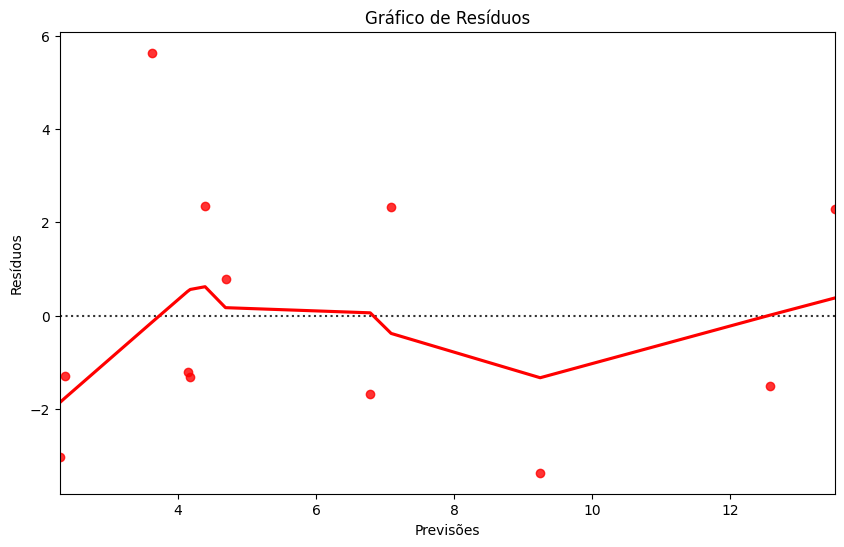

In [167]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, color="red")
plt.title('Gráfico de Resíduos')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Correlação entre as colunas e os indicadores chaves

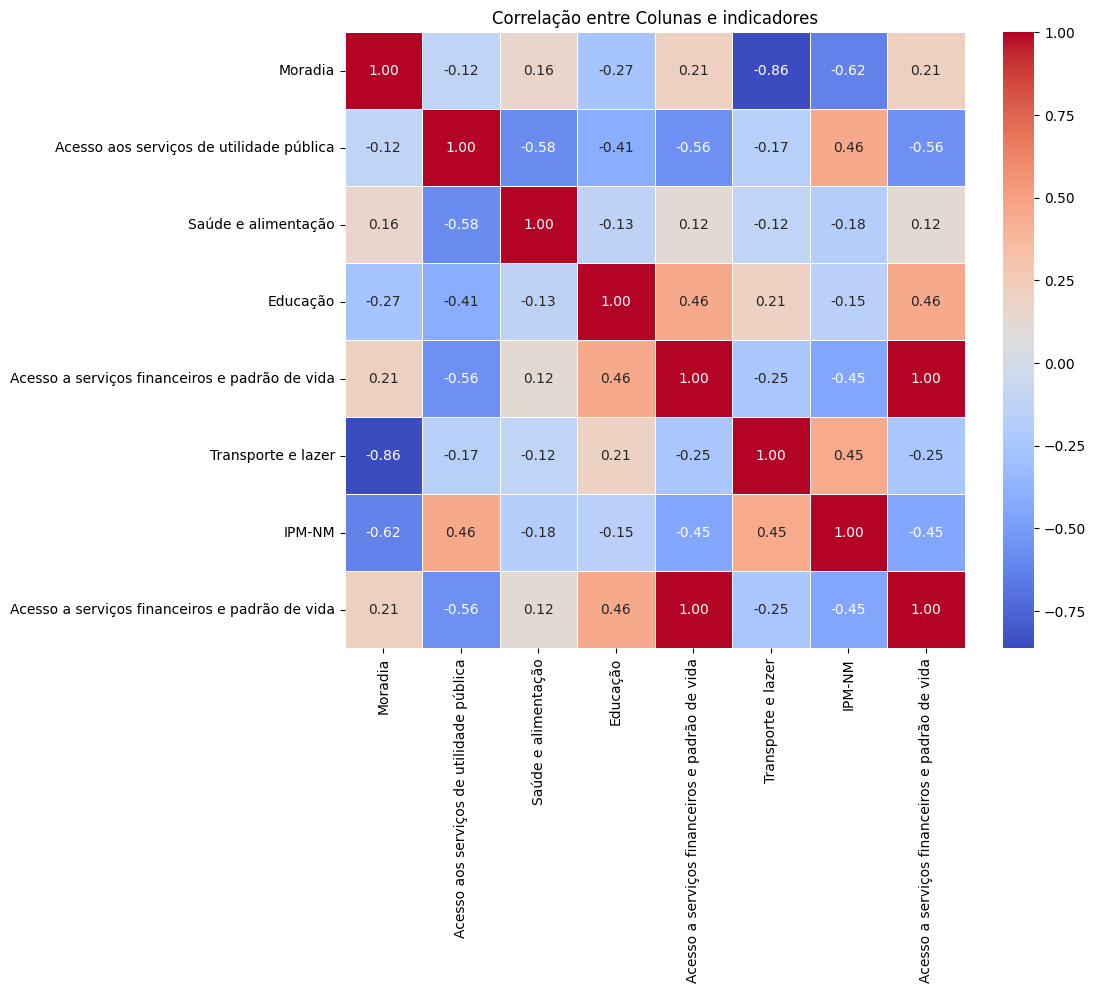

In [186]:
colunas = ['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
             'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']
indicadores = ['IPM-NM','Acesso a serviços financeiros e padrão de vida']


data_correlation = pof6[colunas + indicadores]

# Calculo da matriz de correlação
correlation_matrix = data_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Colunas e indicadores')
plt.show()

## Avaliação do modelo usando o Erro Quadrático Médio (MSE)

In [148]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Coeficiente de Determinação (R^2) para Random Forest
r2_rf = rf_model.score(X_test, y_test)

In [149]:
y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [150]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 7.424969270100038


O **Mean Squared Error (MSE)** é a média dos quadrados dos erros entre as previsões do modelo e os valores reais. *Quanto menor o MSE, melhor para o modelo*. Neste caso, o valor de MSE indica que, em média, os quadrados dos erros são cerca de **7.42**

## Avaliação do modelo usando o Root Mean Squad Error (RMSE)

In [151]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.7248796799308477


**O Root Mean Squared Error (RMSE)** é a raiz quadrada do MSE. Ele fornece uma interpretação mais intuitiva, pois está na mesma unidade que a variável de resposta. Neste caso, o RMSE indica que, em média, os erros são cerca de **2.72** unidades.

In [152]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2.0626048854416648


## Avaliação do modelo usando o Mean Absolute Error (MAE)

O **Mean Absolute Error (MAE)** é a média dos valores absolutos dos erros entre as previsões e os valores reais. Ele mede a magnitude média dos erros sem considerar a direção. Neste caso, o MAE indica que, em média, os erros são cerca de 2.06 unidades.

In [153]:
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.5955151424910805


## Avaliação do modelo usando o R-Squared (R²)

O **R-squared (R²)**, ou coeficiente de determinação, mede a proporção da variabilidade na variável de resposta que é explicada pelo modelo. *Um valor de 1 indica um ajuste perfeito, enquanto um valor de 0 indica que o modelo não explica nada da variabilidade.*<br><br>
Neste caso, o R² de aproximadamente 0.59 sugere que o modelo explica cerca de 59% da variabilidade nos dados, o que pode ser considerado um ajuste razoável.

## Gráfico de Dispersão do desempenho do modelo de regressão

##Predição no Conjunto de Teste

In [154]:
y_pred_rf = rf_model.predict(X_test)

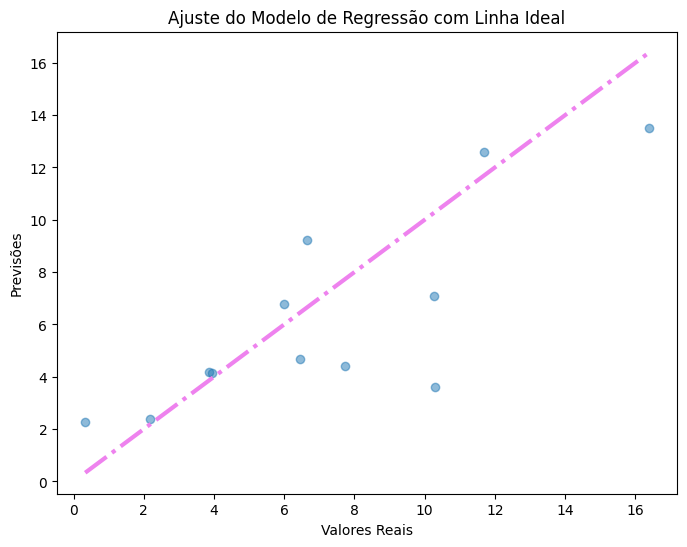

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='violet', linestyle='-.', linewidth=3)
plt.title('Ajuste do Modelo de Regressão com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

# Treinando modelo de **KNN**

In [156]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

### O modelo K-Nearest Neighbors (KNN) **não fornece uma medida direta da importância dos recursos das features como os modelos baseados em árvores**, como o Random Forest. Isso ocorre porque o KNN é um algoritmo baseado em instância que não aprende coeficientes ponderados para cada recurso, mas sim faz previsões com base na similaridade das instâncias mais próximas. Sendo assim, não foi gerado o valor de relevância de cada feature.

## Avaliação do modelo usando o Erro Quadrático Médio (MSE)

In [157]:
# Calculando o Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'Mean Squared Error (MSE): {mse_knn:.2f}')

Mean Squared Error (MSE): 5.30


O **Mean Squared Error (MSE)** é a média dos quadrados dos erros entre as previsões do modelo e os valores reais. *Quanto menor o MSE, melhor para o modelo*. Neste caso, o valor de MSE indica que, em média, os quadrados dos erros são cerca de **5.30**

## Avaliação do modelo usando o Root Mean Squad Error (RMSE)

In [158]:
# Calculando a raiz do erro quadrático médio (RMSE)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_knn:.2f}')

Root Mean Squared Error (RMSE): 2.30


**O Root Mean Squared Error (RMSE)** é a raiz quadrada do MSE. Ele fornece uma interpretação mais intuitiva, pois está na mesma unidade que a variável de resposta. Neste caso, o RMSE indica que, em média, os erros são cerca de **2.30** unidades.

## Avaliação do modelo usando o Mean Absolute Error (MAE)

In [159]:
# Calculando o erro absoluto médio (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error (MAE): {mae_knn:.2f}')

Mean Absolute Error (MAE): 2.00


O **Mean Absolute Error (MAE)** é a média dos valores absolutos dos erros entre as previsões e os valores reais. Ele mede a magnitude média dos erros sem considerar a direção. Neste caso, o MAE indica que, em média, os erros são cerca de 2.00 unidades.

## Avaliação do modelo usando o R-Squared (R²)

### Calculando o coeficiente de determinação R²

In [160]:
# Calculando o coeficiente de determinação R^2
r2_knn = r2_score(y_test, y_pred_knn)
print(f'R-squared (R²): {r2_knn:.2f}')

R-squared (R²): 0.71


O **R-squared (R²)**, ou coeficiente de determinação, mede a proporção da variabilidade na variável de resposta que é explicada pelo modelo. *Um valor de 1 indica um ajuste perfeito, enquanto um valor de 0 indica que o modelo não explica nada da variabilidade.*<br><br>
Neste caso, o R² de aproximadamente **0.71** sugere que o modelo explica cerca de 59% da variabilidade nos dados, o que pode ser considerado um ajuste razoável.

## Gráfico de Dispersão do desempenho do modelo de regressão

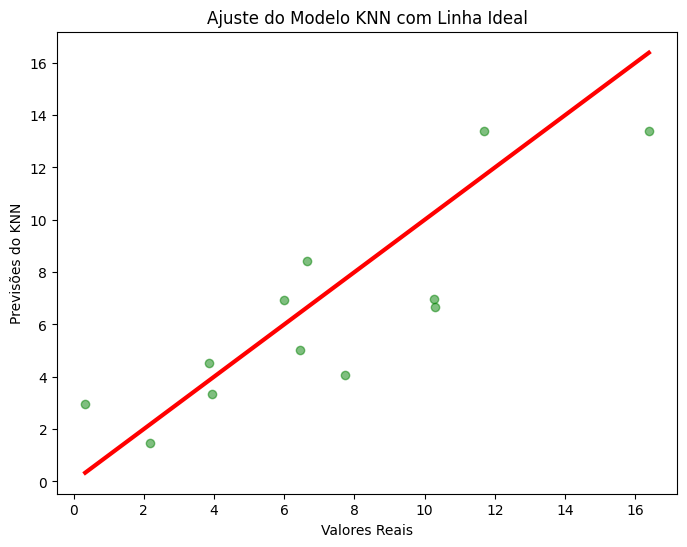

In [162]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green')  # Alterando a cor para verde
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=3)
plt.title('Ajuste do Modelo KNN com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do KNN')
plt.show()

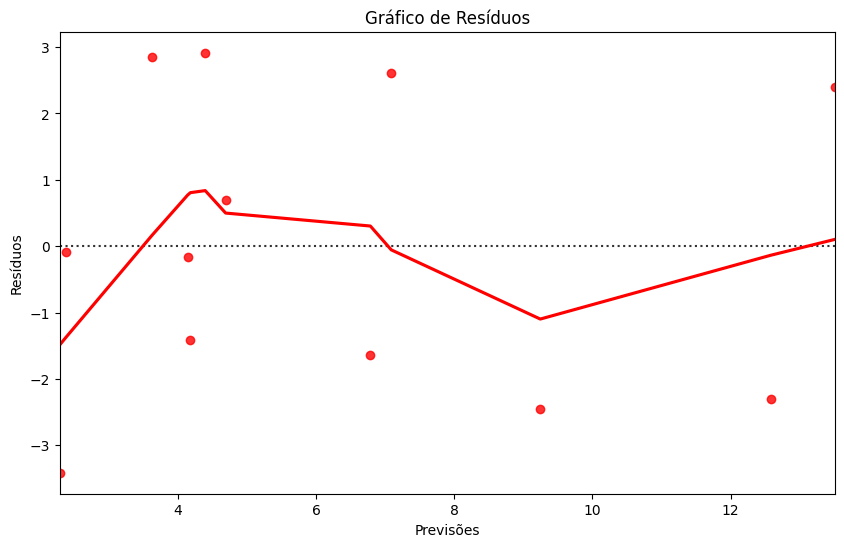

In [163]:
# Calcule os resíduos
residuals = y_test - y_pred_knn

# Crie o gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, color="red")
plt.title('Gráfico de Resíduos')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

# Treinando modelo de Gradient Boosting

In [171]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

## Métricas do modelo

In [172]:

# Avaliação do modelo usando o Erro Quadrático Médio (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Coeficiente de Determinação (R^2) para Gradient Boosting
r2_gb = gb_model.score(X_test, y_test)

# Calculando métricas de regressão
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

# Imprimindo as métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 7.574802986763102
Root Mean Squared Error (RMSE): 2.7522359976504744
Mean Absolute Error (MAE): 2.154007904587669
R-squared (R²): 0.5873527559100955


# Gráfico de dispersão do Gradient Boosting


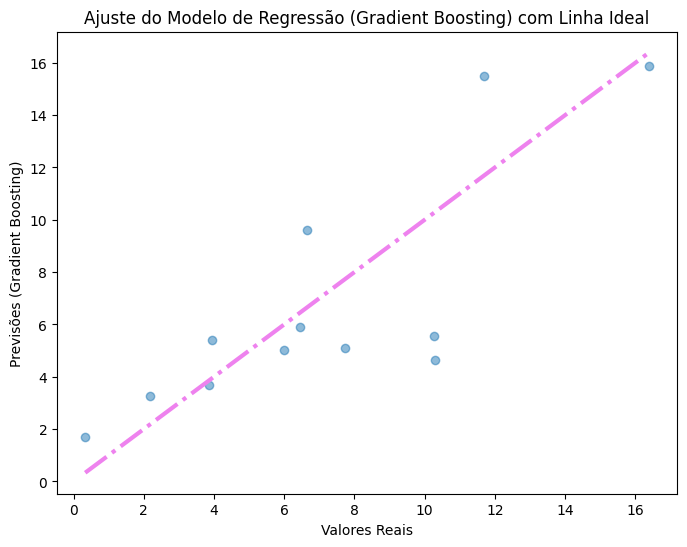

In [173]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='violet', linestyle='-.', linewidth=3)
plt.title('Ajuste do Modelo de Regressão (Gradient Boosting) com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões (Gradient Boosting)')
plt.show()

In [179]:
# Obtendo a importância de cada recurso
feature_importances = gb_model.feature_importances_

# Criando um DataFrame para exibir a importância de cada recurso
feature_importance_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Classificando o DataFrame pela importância
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Exibindo a importância de cada recurso
print(feature_importance_df_gb)


                                          Feature  Importance
0                                         Moradia    0.455023
3                                        Educação    0.157701
5                              Transporte e lazer    0.152632
4  Acesso a serviços financeiros e padrão de vida    0.126497
2                             Saúde e alimentação    0.067940
1        Acesso aos serviços de utilidade pública    0.040207


In [180]:
# Crie uma visualização interativa usando o Plotly
fig = px.bar(feature_importance_df_gb, x='Feature', y='Importance', title='Importância de cada Feature no modelo de Random Forest',
             labels={'Importance': 'Importância', 'Feature': 'Feature'}, text='Importance')
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


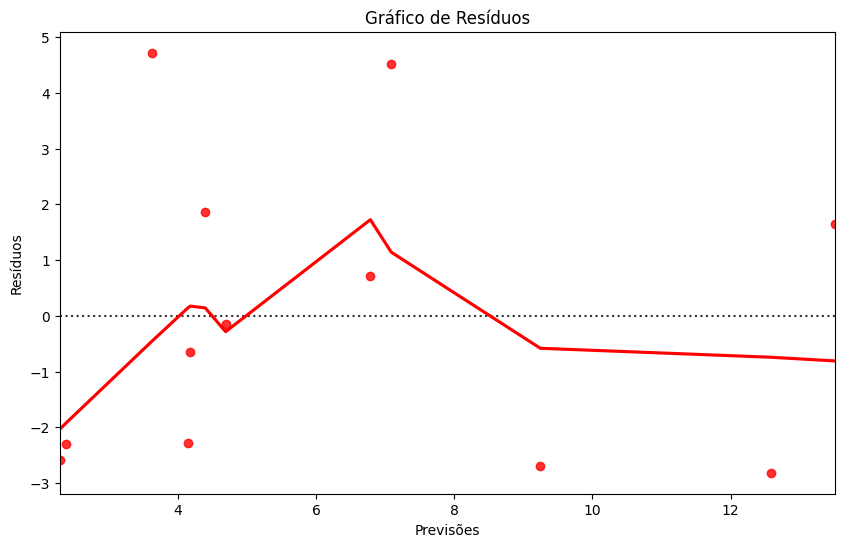

In [181]:
# Calcule os resíduos
residuals = y_test - y_pred_gb

# Crie o gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, color="red")
plt.title('Gráfico de Resíduos')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

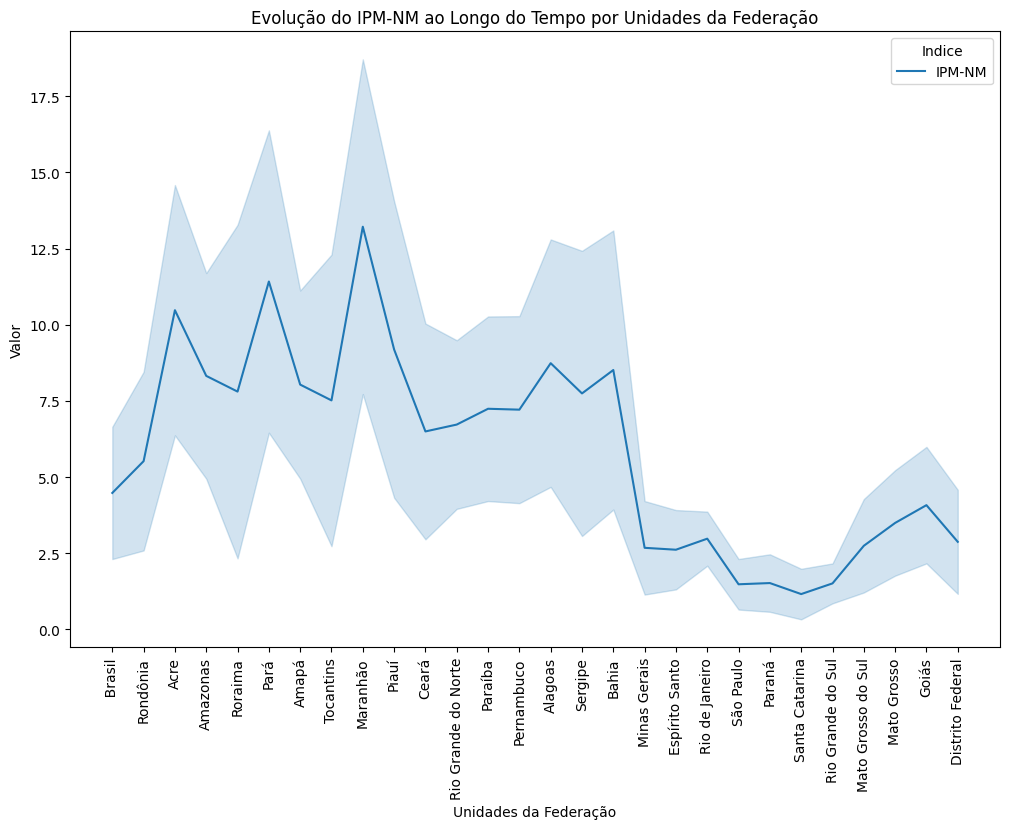

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecione as colunas relevantes para o gráfico de linhas temporais
columns_to_plot = ['Unidades da Federação', 'IPM-NM']

# Crie um DataFrame apenas com as colunas selecionadas
df_plot = pof6[columns_to_plot]

# Melt o DataFrame para facilitar a visualização
df_plot_melted = pd.melt(df_plot, id_vars='Unidades da Federação', var_name='Indice', value_name='Valor')

# Crie um gráfico de linhas temporais usando seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Unidades da Federação', y='Valor', hue='Indice', data=df_plot_melted)
plt.title('Evolução do IPM-NM ao Longo do Tempo por Unidades da Federação')
plt.xlabel('Unidades da Federação')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.show()

# Conclusão

No decorrer deste Colab, empregamos três modelos distintos de aprendizado de máquina, a saber, o Random Forest, o K-Nearest Neighbors (KNN) e o Gradient Boosting. A nossa motivação para a utilização destes modelos foi confrontar suas performances e determinar qual deles se destaca na tarefa de regressão. O intuito final era obter métricas robustas que nos permitissem aprimorar as features para o infográfico.